# Importing libraries

In [1]:
from openpy_ts_clu import clustering_kmeans, scenarios, example
import matplotlib.pyplot as plt

G:\Mi unidad\GitHub\OpenPy-TS-Clu\openpy_ts_clu\clustering_algorithm.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Load example

In [2]:
dataset = example()

In [3]:
dataset.head()

,energy(kWh/hh),LCLid
tstp,,
2011-11-23 09:00:00,0.059,MAC000162
2011-11-23 09:30:00,0.082,MAC000162
2011-11-23 10:00:00,0.302,MAC000162
2011-11-23 10:30:00,0.117,MAC000162
2011-11-23 11:00:00,0.073,MAC000162


In [4]:
dataset.LCLid.unique()

array(['MAC000162', 'MAC000023', 'MAC005277', 'MAC000324', 'MAC005268',
       'MAC000165', 'MAC000150', 'MAC000221', 'MAC000228', 'MAC000152',
       'MAC000153', 'MAC000169', 'MAC005038', 'MAC005183', 'MAC005178',
       'MAC005185', 'MAC005187', 'MAC000270', 'MAC000242', 'MAC000274',
       'MAC000018', 'MAC000078', 'MAC000033', 'MAC000034', 'MAC000036',
       'MAC000021', 'MAC005180', 'MAC000086', 'MAC000145', 'MAC000060',
       'MAC000588', 'MAC000054'], dtype=object)

In [5]:
len(dataset.LCLid.unique())

32

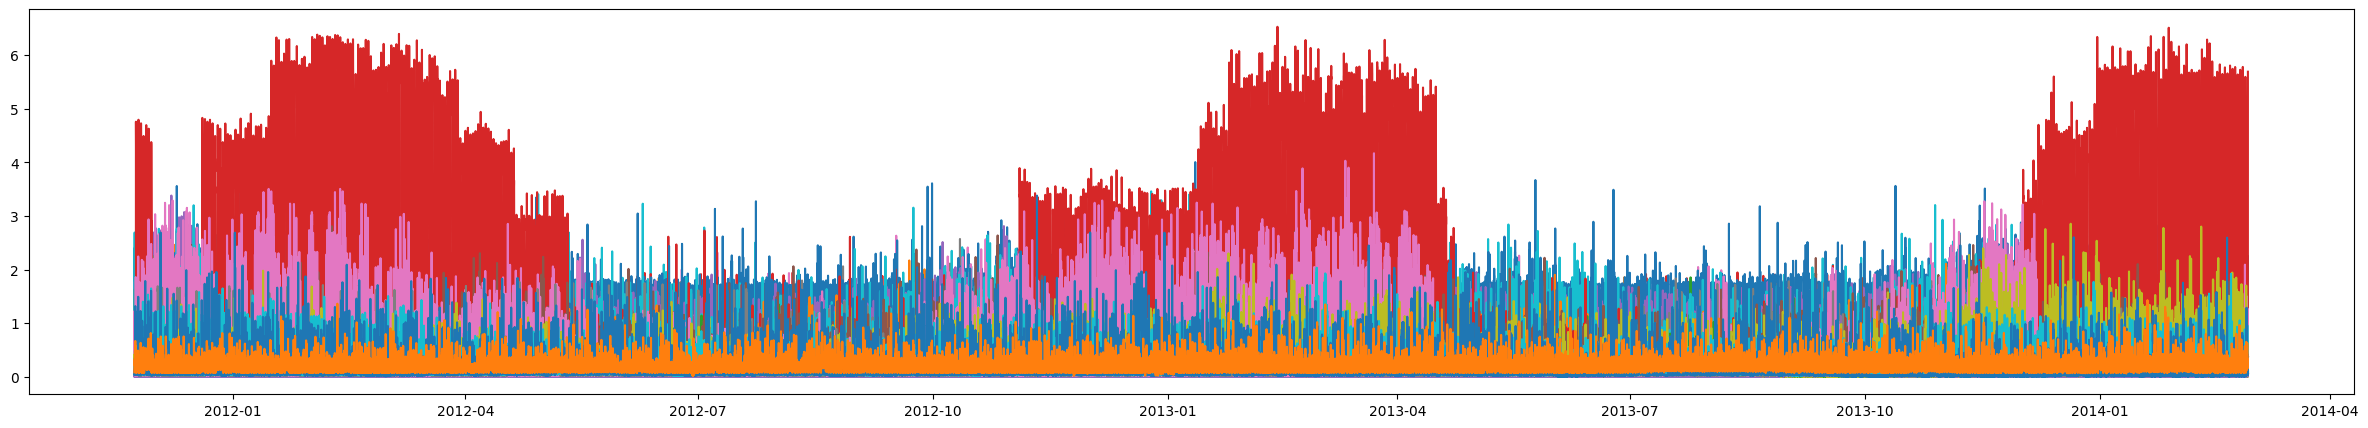

In [14]:
for i in dataset.LCLid.unique():
    plt.plot(dataset[dataset.LCLid == i]['energy(kWh/hh)'], label=i)
plt.rcParams["figure.figsize"] = (20,5)

# Load scenarios

In [3]:
dict_sce = scenarios.dictionary()
dict_sce['seasons'] = ['Winter']  # ['Summer', 'Fall', 'Winter', 'Spring']
# dict_sce['month'] = ['January']  # ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# dict_sce['year'] = [2013]  # [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
dict_sce['day_name'] = ['Monday']  # ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dict_sce['day_type'] = ['working']  # ['working', 'non-working']

# Create dataset with multiple users

In [ ]:
df_multi = scenarios.multiple_users(
        # file_path=path_AMI,
        dict_scenario=dict_sce,
        id_col_users='LCLid',
        variable='energy(kWh/hh)'
    )

In [5]:
df_multi.head()

LCLid,MAC000017,MAC000018,MAC000019,MAC000020,MAC000021,MAC000022,MAC000023,MAC000024,MAC000025,MAC000026,...,hour,day,weekday,month,year,seasons,day_name,day_type,date,count_day
index,,,,,,,,,,,,,,,,,,,,,
2012-06-04 00:00:00,0.181,0.181,0.076,0.073,0.388,0.175,0.122,0.149,0.028,0.128,...,0,4,0,June,2012,Winter,Monday,working,2012-06-04,D124
2012-06-04 00:30:00,0.053,0.129,0.084,0.057,0.382,0.183,0.073,0.038,0.005,0.129,...,0,4,0,June,2012,Winter,Monday,working,2012-06-04,D124
2012-06-04 01:00:00,0.075,0.121,0.031,0.056,0.394,0.230,0.053,0.054,0.015,0.147,...,1,4,0,June,2012,Winter,Monday,working,2012-06-04,D124
2012-06-04 01:30:00,0.055,0.123,0.050,0.069,0.385,0.058,0.055,0.191,0.018,0.198,...,1,4,0,June,2012,Winter,Monday,working,2012-06-04,D124
2012-06-04 02:00:00,0.037,0.187,0.096,0.054,0.392,0.042,0.053,0.080,0.005,0.165,...,2,4,0,June,2012,Winter,Monday,working,2012-06-04,D124


In [6]:
model = clustering_kmeans(
    model='KMeans',
    users=None,
    metric='dtw',
    df_sce=df_multi,
    type_dr='mds'
)


In [ ]:
model.optimal_number_of_clusters(max_clusters=8, plt_metrics=True)

  0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
model.get_dendograma(n_cluster=4)

In [ ]:
dict_clu = model.train_clu_model(n_clusters=4, acum_bar=True, points_2d=True)

In [ ]:
dict_clu.keys()

In [ ]:
dict_clu['dataset']

In [ ]:
dict_clu = model.cluster_ts_extraction(n_clusters=4, all_barycenters=True, plt_all_graphs=True)

In [ ]:
dict_clu.keys()

In [ ]:
dict_clu['dataset']

In [ ]:
len(dict_clu['euclidean'])

In [ ]:
for i in range(len(dict_clu['centroid'])):
    plt.plot(dict_clu['centroid'][i], label='Cluster ' + str(i + 1))
plt.legend()

In [ ]:
for i in range(len(dict_clu['euclidean'])):
    plt.plot(dict_clu['euclidean'][i], label='Cluster ' + str(i + 1))
plt.legend()